In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

In [6]:
results_path = '../Metrics/results/'

In [7]:
csv_paths = sorted(glob(results_path + '*'))

In [8]:
def get_method(name):
    s = name
    s = s.split('/')[1]
    s = s.split('-', 1)[1]

    if s.startswith('tsne'):
        return s[:7]
    elif s.startswith('dtsne'):
        return 'dtsne'
    elif s.startswith('pca'):
        return s[:6]
    elif s.startswith('umap'):
        return s[:7]
    else:
        return s.split('_')[0]

In [9]:
df_metrics = pd.DataFrame()
for p in csv_paths:
    df = pd.read_csv(p)
    df = df.drop(['spat_kl', 'stab_kl'], axis=1)  # Bad metric
    # Extract dataset and method into own column
    df.columns = np.concatenate([['name'], df.columns.values[1:]])
    df['dataset'] = df['name'].str.split('_', 1).str[0].str.extract(r'.*/(.*)-.*')
    df['method'] = df['name'].apply(get_method)
    df = df.set_index('name')
    
    # Average nh and np metrics 
    cols = [c for c in df.columns if 'spat_nh_' in c]
    df['spat_nh_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_np_' in c]
    df['spat_np_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_trust_' in c]
    df['spat_trust_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_cont_' in c]
    df['spat_cont_mean'] = np.mean(df[cols], axis=1)
    
    df_metrics = pd.concat([df_metrics, df])

In [10]:
methods = ['AE', 'VAE', 'h_spacer', 'tsne_s1', 'tsne_s4', 'dtsne', 'h_spacer', 'umap_s1', 'umap_s4', 'h_spacer', 'pca_s1', 'pca_s4']
metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
invert_colormap = ['stab_stress_n', 'stab_stress_s', 'spat_stress_n', 'spat_stress_s']

In [11]:
meta = df_metrics[['dataset', 'method']]
df_metrics = df_metrics[metrics]

In [12]:
df_metrics = (df_metrics - df_metrics.min()) / (df_metrics.max() - df_metrics.min())
df_metrics['spat_stress_s'] = 1 - df_metrics['spat_stress_s']
df_metrics['stab_stress_s'] = 1 - df_metrics['stab_stress_s']

In [13]:
df_metrics = pd.merge(meta, df_metrics, left_index=True, right_index=True)
df_all_runs = df_metrics
df_metrics = df_metrics[df_metrics['method'].isin(methods)]

In [14]:
df_metrics.head()

dataset   method  spat_pearson  \
name                                                                            
Output/cartolastd-AE_10f_10f_2f_50ep.csv    cartolastd       AE      0.919375   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv  cartolastd      VAE      0.929376   
Output/cartolastd-tsne_s1_30p.csv           cartolastd  tsne_s1      0.805397   
Output/cartolastd-tsne_s4_30p.csv           cartolastd  tsne_s4      0.748642   
Output/cartolastd-dtsne_100p_0-1l.csv       cartolastd    dtsne      0.815499   

                                            spat_spearman  spat_kendall  \
name                                                                      
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.945078      0.860250   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       0.958556      0.885360   
Output/cartolastd-tsne_s1_30p.csv                0.807043      0.659359   
Output/cartolastd-tsne_s4_30p.csv                0.739331      0.586092   
Output/cartolastd-dtsne_100p_0-1l.csv            0.829540      0.684607   

                                            spat_stress_s  spat_nh_mean  \
name                                                                      
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.919375      0.312471   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       0.929376      0.429992   
Output/cartolastd-tsne_s1_30p.csv                0.805397      0.471568   
Output/cartolastd-tsne_s4_30p.csv                0.748642      0.372546   
Output/cartolastd-dtsne_100p_0-1l.csv            0.815499      0.397347   

                                            spat_np_mean  spat_trust_mean  \
name                                                                        
Output/cartolastd-AE_10f_10f_2f_50ep.csv        0.588201         0.882691   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv      0.760766         0.919837   
Output/cartolastd-tsne_s1_30p.csv               0.721855         0.912679   
Output/cartolastd-tsne_s4_30p.csv               0.512664         0.703485   
Output/cartolastd-dtsne_100p_0-1l.csv           0.669454         0.881975   

                                            spat_cont_mean  stab_pearson  \
name                                                                       
Output/cartolastd-AE_10f_10f_2f_50ep.csv          0.798291      0.858736   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv        0.910607      0.922775   
Output/cartolastd-tsne_s1_30p.csv                 0.863318      0.438419   
Output/cartolastd-tsne_s4_30p.csv                 0.624727      0.711466   
Output/cartolastd-dtsne_100p_0-1l.csv             0.846269      0.486706   

                                            stab_spearman  stab_kendall  \
name                                                                      
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.998245      0.991113   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       1.000000      0.998352   
Output/cartolastd-tsne_s1_30p.csv                0.342575      0.259075   
Output/cartolastd-tsne_s4_30p.csv                0.856664      0.773768   
Output/cartolastd-dtsne_100p_0-1l.csv            0.266308      0.191226   

                                            stab_stress_s  
name                                                       
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.858736  
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       0.922775  
Output/cartolastd-tsne_s1_30p.csv                0.438419  
Output/cartolastd-tsne_s4_30p.csv                0.711466  
Output/cartolastd-dtsne_100p_0-1l.csv            0.486706

## Dataset trait correlation table

In [15]:
dataset_traits = {'cartolastd' : [696,19,17,5,0.647,0],
                    'cifar10cnn' : [1000,30,10,10,0.6599,0],
                    'esc50' : [320,108,128,8,0.0345,0],
                    'fashion' : [1000,10,784,10,0.4762,0.2971],
                    'gaussians' : [2000,10,100,10,0.368,0],
                    'nnset' : [80,30,8070,8,0.0057,0.0001],
                    'qtables' : [180,40,1200,9,0.0077,0.0007],
                    'quickdraw' : [600,89,784,6,0.4309,0.9013],
                    'sorts' : [80,100,100,8,0.3505,0.01],
                    'walk' : [300,50,100,3,0.4783,0.0001]}

dataset_traits = pd.DataFrame.from_dict(dataset_traits, orient='index', columns=['items', 'timesteps', 'dims', 'classes', 'intrinsic_dim', 'sparsity_ratio'])
dataset_traits

items  timesteps  dims  classes  intrinsic_dim  sparsity_ratio
cifar10cnn   1000         30    10       10         0.6599          0.0000
gaussians    2000         10   100       10         0.3680          0.0000
walk          300         50   100        3         0.4783          0.0001
nnset          80         30  8070        8         0.0057          0.0001
cartolastd    696         19    17        5         0.6470          0.0000
quickdraw     600         89   784        6         0.4309          0.9013
sorts          80        100   100        8         0.3505          0.0100
esc50         320        108   128        8         0.0345          0.0000
qtables       180         40  1200        9         0.0077          0.0007
fashion      1000         10   784       10         0.4762          0.2971

In [16]:
spat_dist_cols = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s']
spat_neigh_cols = ['spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean']
stab_cols = ['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']

In [17]:
df = pd.DataFrame(np.array([df_metrics[spat_dist_cols].mean(axis=1),
                            df_metrics[spat_neigh_cols].mean(axis=1),
                            df_metrics[stab_cols].mean(axis=1)]).T,
                            index=df_metrics['dataset'], columns=['spat_dist_cols', 'spat_neigh_cols', 'stab_cols'])

In [18]:
for t in dataset_traits.columns:
    df[t] = [dataset_traits.loc[d][t] for d in df.index]

In [19]:
corr_table = df.corr()
corr_table = corr_table.iloc[:3,3:]

In [20]:
corr_table

items  timesteps      dims   classes  intrinsic_dim  \
spat_dist_cols  -0.429566   0.145921 -0.076177 -0.285476      -0.007806   
spat_neigh_cols  0.173836  -0.308064 -0.041857  0.277186      -0.060610   
stab_cols        0.150231   0.012017 -0.009754  0.275271      -0.085292   

                 sparsity_ratio  
spat_dist_cols        -0.211705  
spat_neigh_cols       -0.559202  
stab_cols              0.160295

In [21]:
# see https://docs.google.com/spreadsheets/d/1MmP4H2ddPpWyHWsmsgLh_6Pl9UbYPiocpoqksISKcDI/edit#gid=0
# edited and with colors

In [22]:
# Sanity check

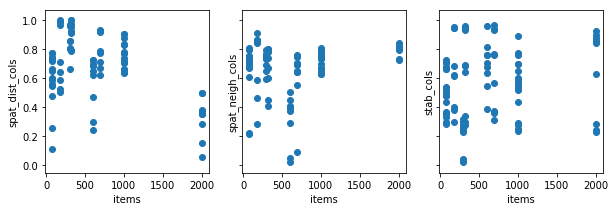

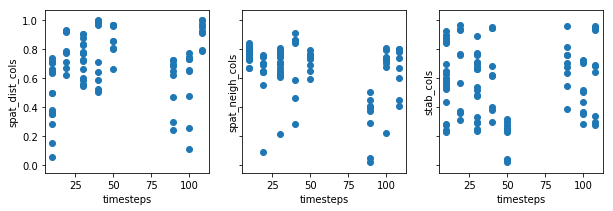

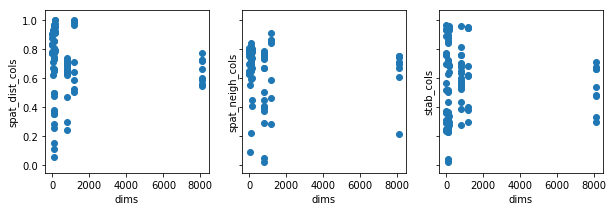

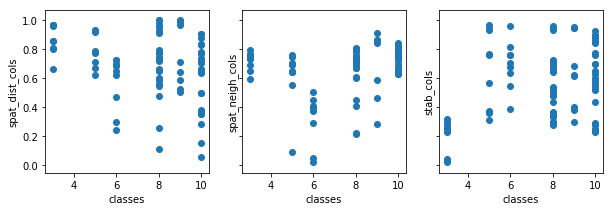

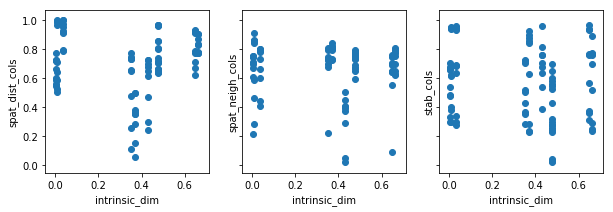

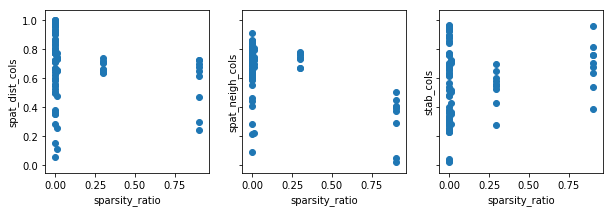

In [23]:
for t in ['items', 'timesteps', 'dims', 'classes', 'intrinsic_dim', 'sparsity_ratio']:
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,3), sharey=True)
    for i, m in enumerate(['spat_dist_cols', 'spat_neigh_cols', 'stab_cols']):
        axs[i].scatter(df[t], df[m])
        axs[i].set_xlabel(t)
        axs[i].set_ylabel(m)

## t-SNE plots of the metric results

In [24]:
df_metrics = df_all_runs  # get back conv methods

In [25]:
df_metrics.head()

dataset   method  spat_pearson  \
name                                                                            
Output/cartolastd-AE_10f_10f_2f_50ep.csv    cartolastd       AE      0.919375   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv  cartolastd      VAE      0.929376   
Output/cartolastd-tsne_s1_30p.csv           cartolastd  tsne_s1      0.805397   
Output/cartolastd-tsne_s4_30p.csv           cartolastd  tsne_s4      0.748642   
Output/cartolastd-dtsne_100p_0-1l.csv       cartolastd    dtsne      0.815499   

                                            spat_spearman  spat_kendall  \
name                                                                      
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.945078      0.860250   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       0.958556      0.885360   
Output/cartolastd-tsne_s1_30p.csv                0.807043      0.659359   
Output/cartolastd-tsne_s4_30p.csv                0.739331      0.586092   
Output/cartolastd-dtsne_100p_0-1l.csv            0.829540      0.684607   

                                            spat_stress_s  spat_nh_mean  \
name                                                                      
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.919375      0.312471   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       0.929376      0.429992   
Output/cartolastd-tsne_s1_30p.csv                0.805397      0.471568   
Output/cartolastd-tsne_s4_30p.csv                0.748642      0.372546   
Output/cartolastd-dtsne_100p_0-1l.csv            0.815499      0.397347   

                                            spat_np_mean  spat_trust_mean  \
name                                                                        
Output/cartolastd-AE_10f_10f_2f_50ep.csv        0.588201         0.882691   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv      0.760766         0.919837   
Output/cartolastd-tsne_s1_30p.csv               0.721855         0.912679   
Output/cartolastd-tsne_s4_30p.csv               0.512664         0.703485   
Output/cartolastd-dtsne_100p_0-1l.csv           0.669454         0.881975   

                                            spat_cont_mean  stab_pearson  \
name                                                                       
Output/cartolastd-AE_10f_10f_2f_50ep.csv          0.798291      0.858736   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv        0.910607      0.922775   
Output/cartolastd-tsne_s1_30p.csv                 0.863318      0.438419   
Output/cartolastd-tsne_s4_30p.csv                 0.624727      0.711466   
Output/cartolastd-dtsne_100p_0-1l.csv             0.846269      0.486706   

                                            stab_spearman  stab_kendall  \
name                                                                      
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.998245      0.991113   
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       1.000000      0.998352   
Output/cartolastd-tsne_s1_30p.csv                0.342575      0.259075   
Output/cartolastd-tsne_s4_30p.csv                0.856664      0.773768   
Output/cartolastd-dtsne_100p_0-1l.csv            0.266308      0.191226   

                                            stab_stress_s  
name                                                       
Output/cartolastd-AE_10f_10f_2f_50ep.csv         0.858736  
Output/cartolastd-VAE_10f_10f_2f_100ep.csv       0.922775  
Output/cartolastd-tsne_s1_30p.csv                0.438419  
Output/cartolastd-tsne_s4_30p.csv                0.711466  
Output/cartolastd-dtsne_100p_0-1l.csv            0.486706

In [26]:
df_metrics.describe()

spat_pearson  spat_spearman  spat_kendall  spat_stress_s  spat_nh_mean  \
count     94.000000      94.000000     94.000000      94.000000     94.000000   
mean       0.726566       0.724769      0.607250       0.726566      0.552020   
std        0.212049       0.216121      0.218900       0.212049      0.266256   
min        0.000000       0.000000      0.000000       0.000000      0.000000   
25%        0.649868       0.639934      0.491274       0.649868      0.327290   
50%        0.752593       0.768061      0.607198       0.752593      0.481678   
75%        0.876532       0.880801      0.741339       0.876532      0.794600   
max        1.000000       1.000000      1.000000       1.000000      1.000000   

       spat_np_mean  spat_trust_mean  spat_cont_mean  stab_pearson  \
count     94.000000        94.000000       94.000000     94.000000   
mean       0.599997         0.753432        0.724727      0.598748   
std        0.224663         0.230895        0.236708      0.220050   
min        0.000000         0.000000        0.000000      0.000000   
25%        0.495430         0.692429        0.626043      0.418451   
50%        0.664883         0.844627        0.779663      0.601072   
75%        0.745602         0.906030        0.913871      0.758886   
max        1.000000         1.000000        1.000000      1.000000   

       stab_spearman  stab_kendall  stab_stress_s  
count      94.000000     94.000000      94.000000  
mean        0.584603      0.499239       0.598748  
std         0.298853      0.291735       0.220050  
min         0.000000      0.000000       0.000000  
25%         0.273231      0.209986       0.418451  
50%         0.632113      0.494897       0.601072  
75%         0.849728      0.750638       0.758886  
max         1.000000      1.000000       1.000000

In [27]:
# from matplotlib.ticker import NullFormatter
# from sklearn import manifold, datasets

# colors = {'AE':'#ff7878', 'C2AE':'#ff7878', 'VAE':'#ba0000', 'C2VAE':'#ba0000', 
#           'tsne_s1':'#2bf4ff', 'tsne_s4':'#3400d1','dtsne':'#386cb0',
#           'pca_s1':'#059925', 'pca_s4':'#4aff71'}

# X = df_metrics[metrics]

# tsne = manifold.TSNE(n_components=2, random_state=0)
# Y = tsne.fit_transform(X)

# c = [colors[m] for m in df_metrics['method']]

# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(Y[:, 0], Y[:, 1], c=c, s=100)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())

# for c,t in zip(Y, df_metrics['method']):
#     ax.annotate(t, (c[0], c[1]), fontsize=10)

In [28]:
# X = df_metrics[metrics]

# tsne = manifold.TSNE(n_components=2, random_state=0)
# Y = tsne.fit_transform(X)

# l = df_metrics['dataset']
# colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
# d = dict([(y,colors[x]) for x,y in enumerate(sorted(set(l)))])
# c = [d[x] for x in l]

# fig, ax = plt.subplots(figsize=(10,10))
# ax.scatter(Y[:, 0], Y[:, 1], c=c, s=100)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())

# for c,t in zip(Y, l):
#     ax.annotate(t, (c[0], c[1]), fontsize=10)

In [31]:
old_name = ['AE', 'C2AE', 'VAE', 'C2VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'umap_s1', 'umap_s4', 'pca_s1', 'pca_s4']
new_name = ['AE', 'CAE', 'VAE', 'CVAE', 'TF-t-SNE', 'G-t-SNE', 'dt-SNE', 'TF-UMAP', 'G-UMAP', 'TF-PCA', 'G-PCA']
name_dict = dict(zip(old_name, new_name))
list(name_dict)

['tsne_s4',
 'dtsne',
 'VAE',
 'umap_s1',
 'C2AE',
 'pca_s4',
 'umap_s4',
 'pca_s1',
 'AE',
 'tsne_s1',
 'C2VAE']

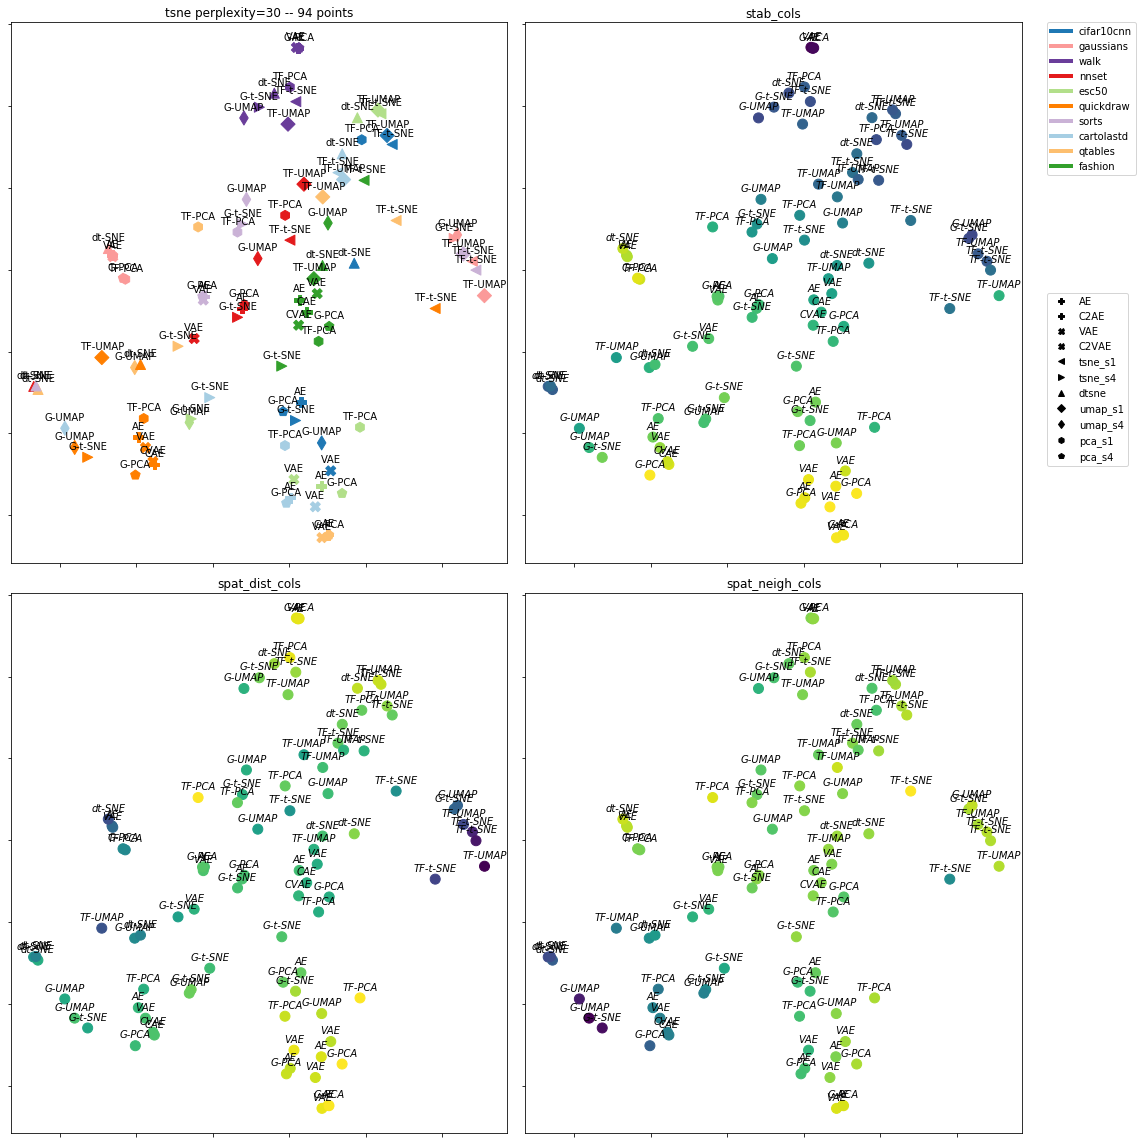

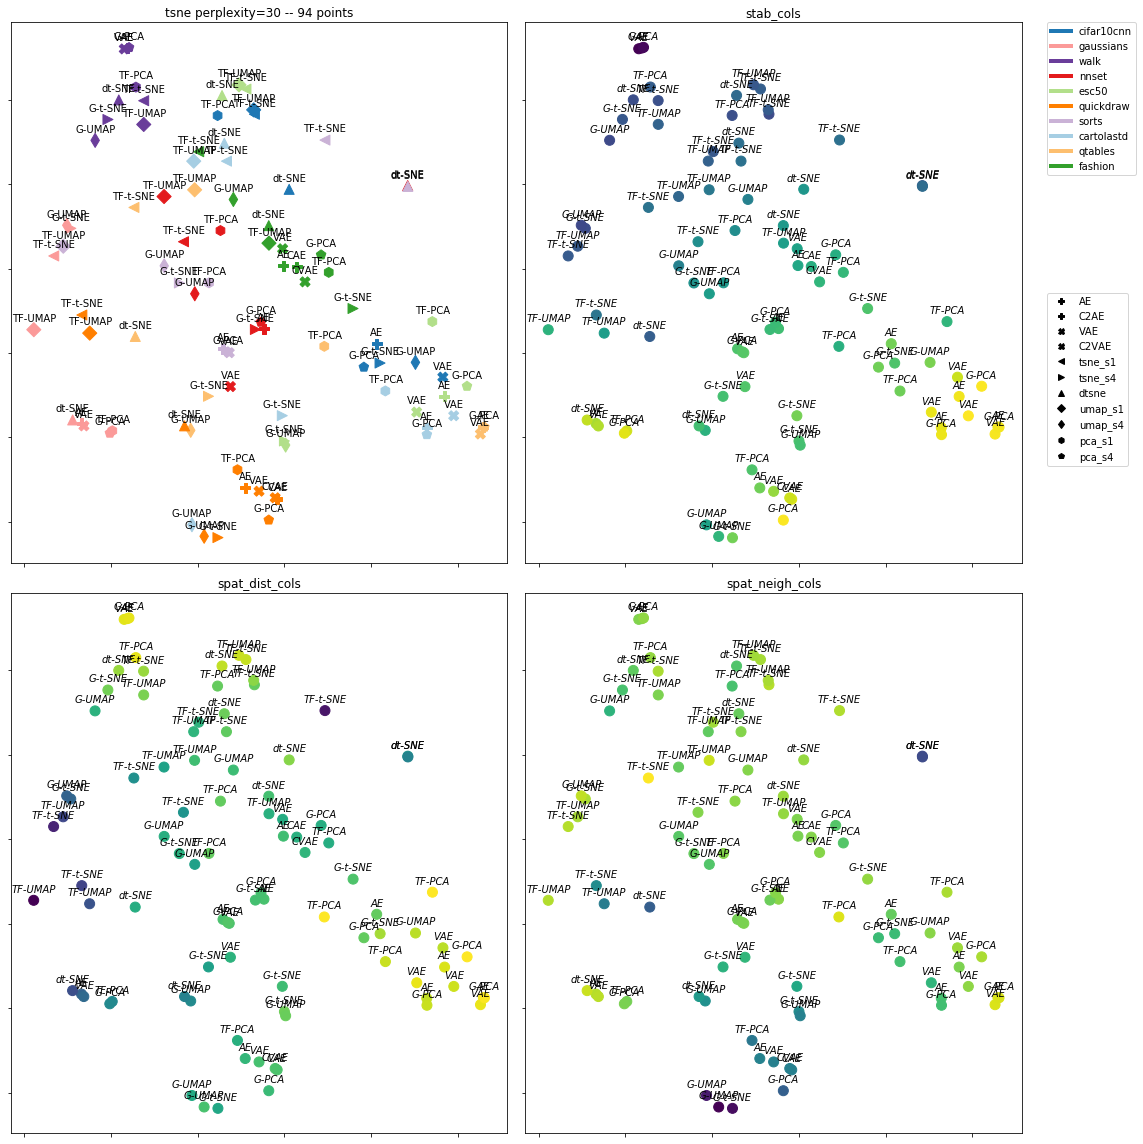

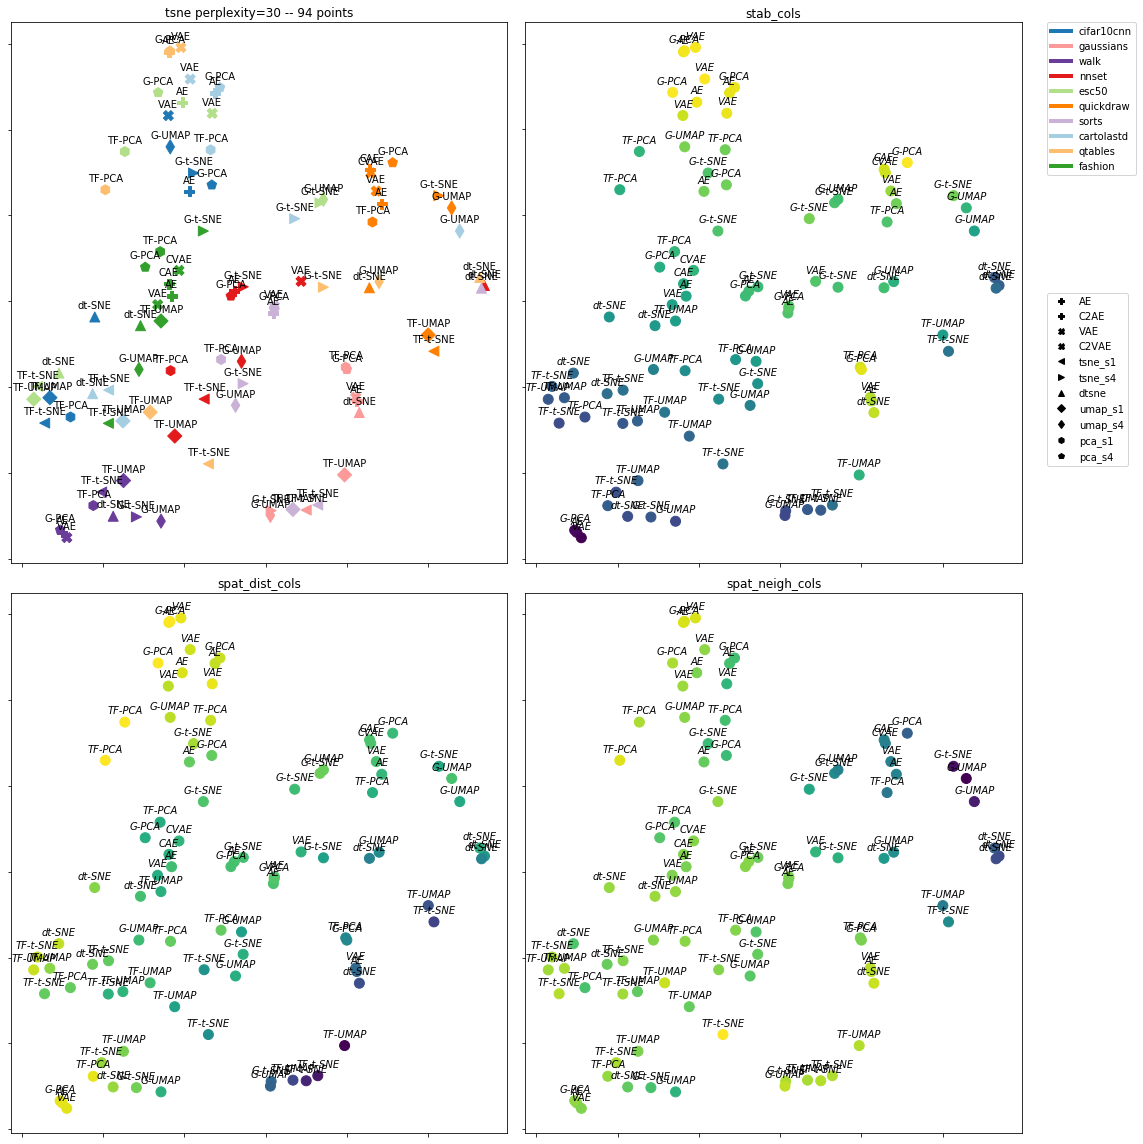

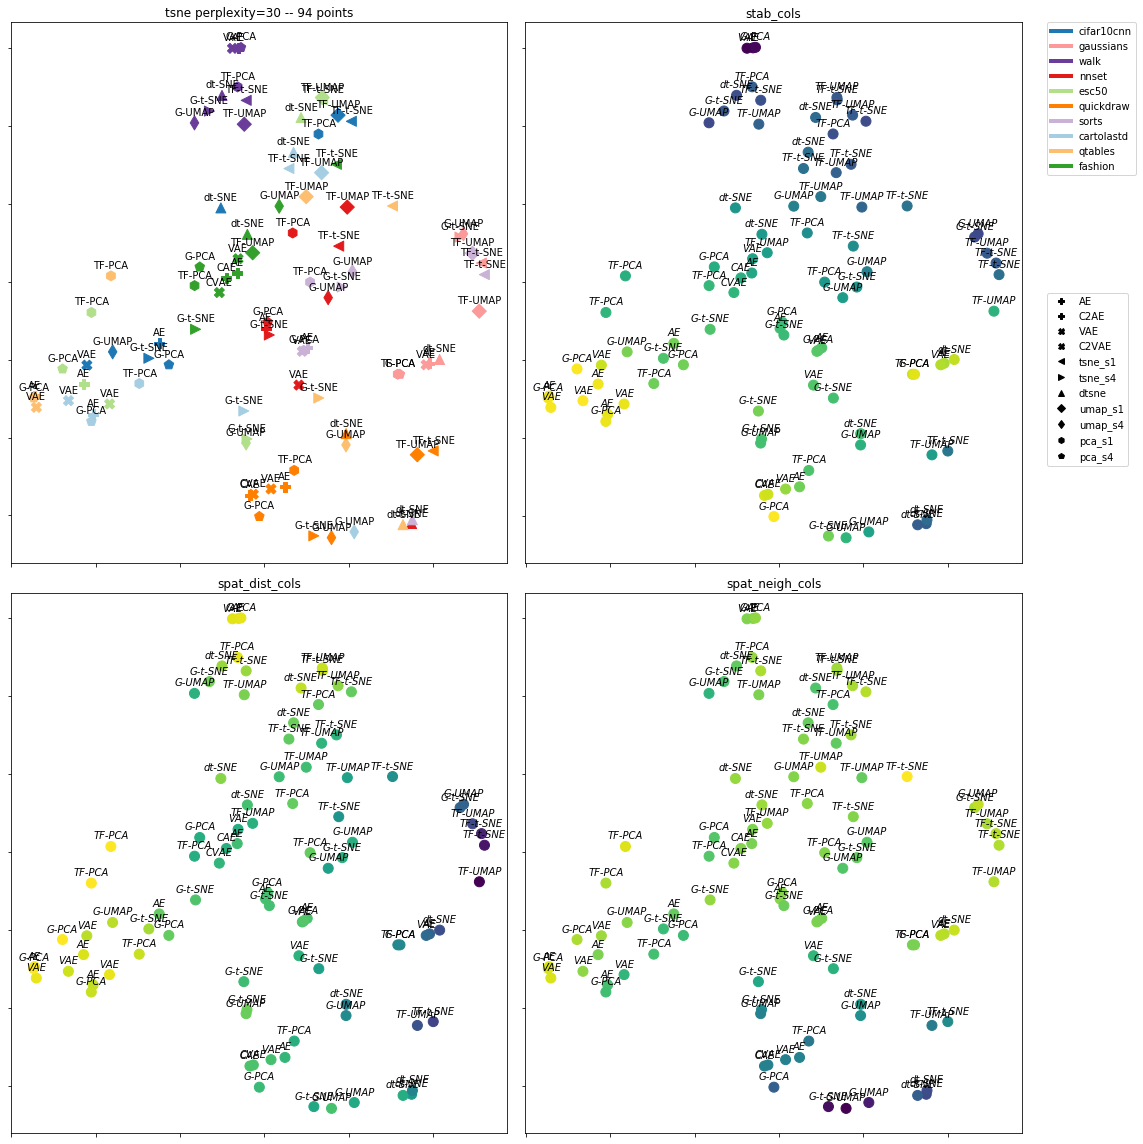

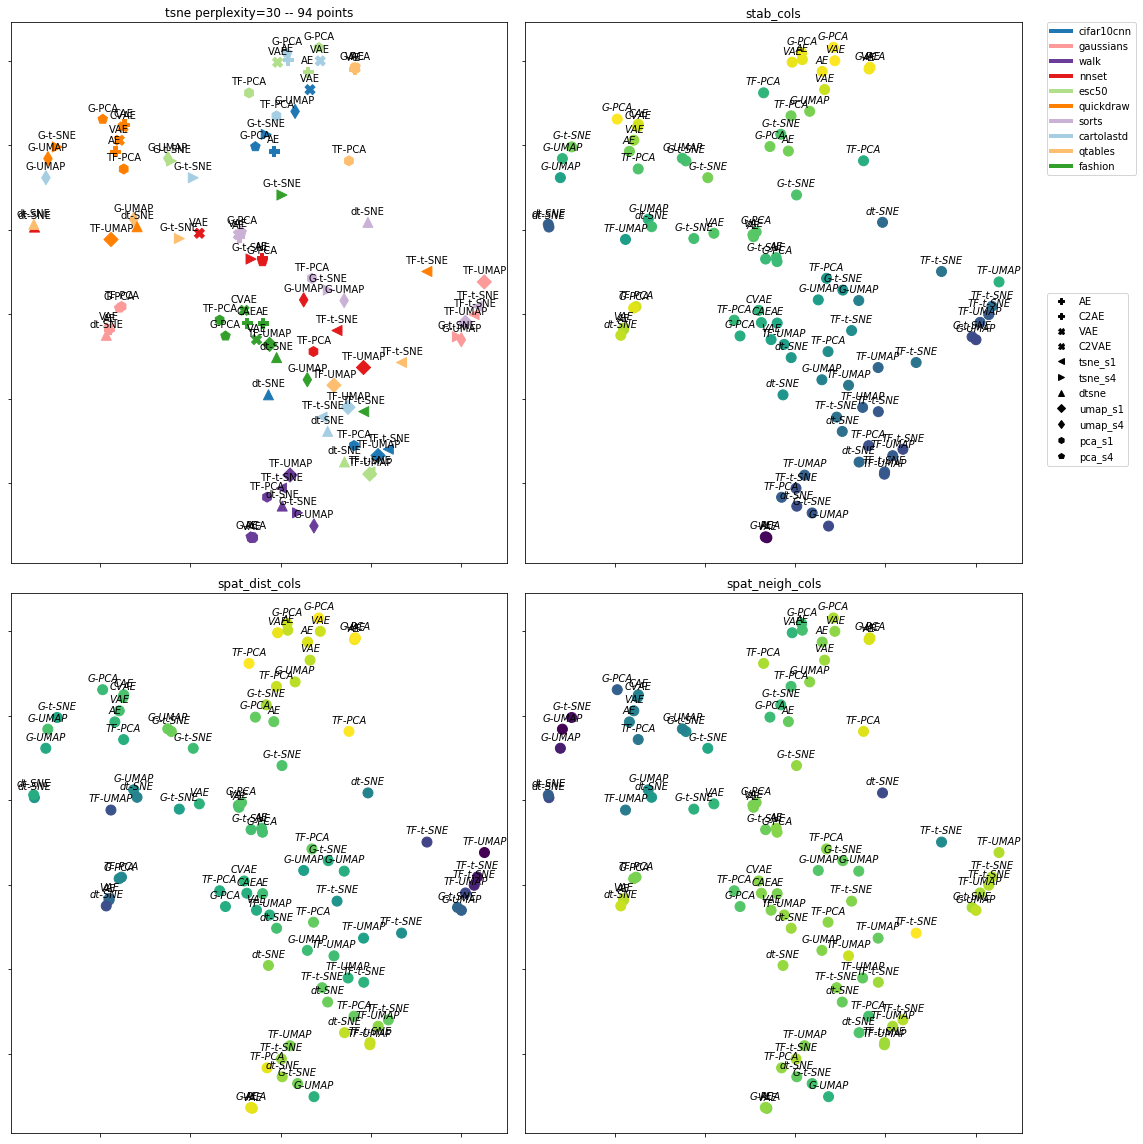

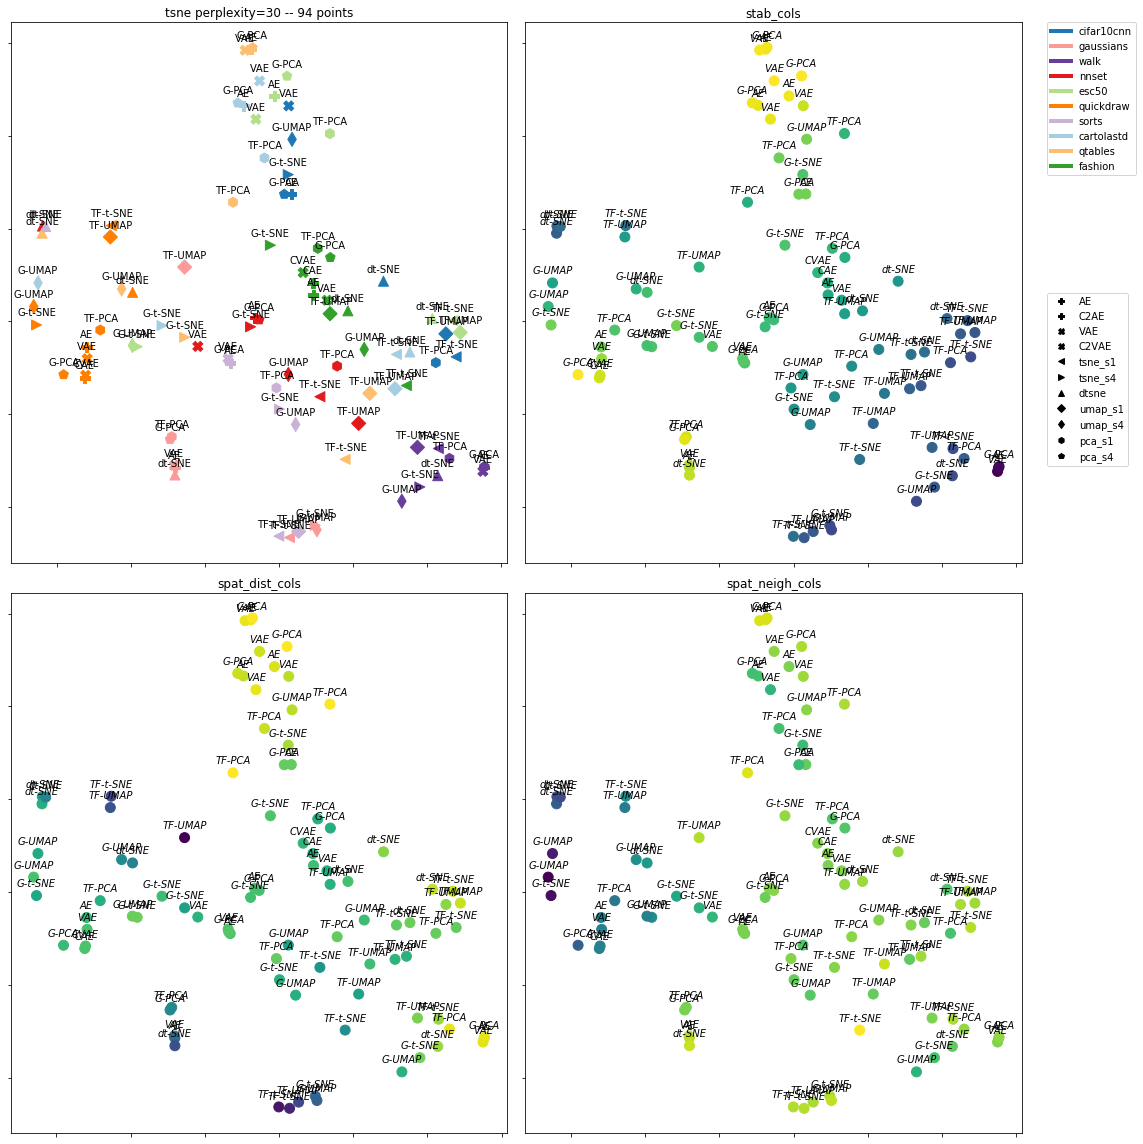

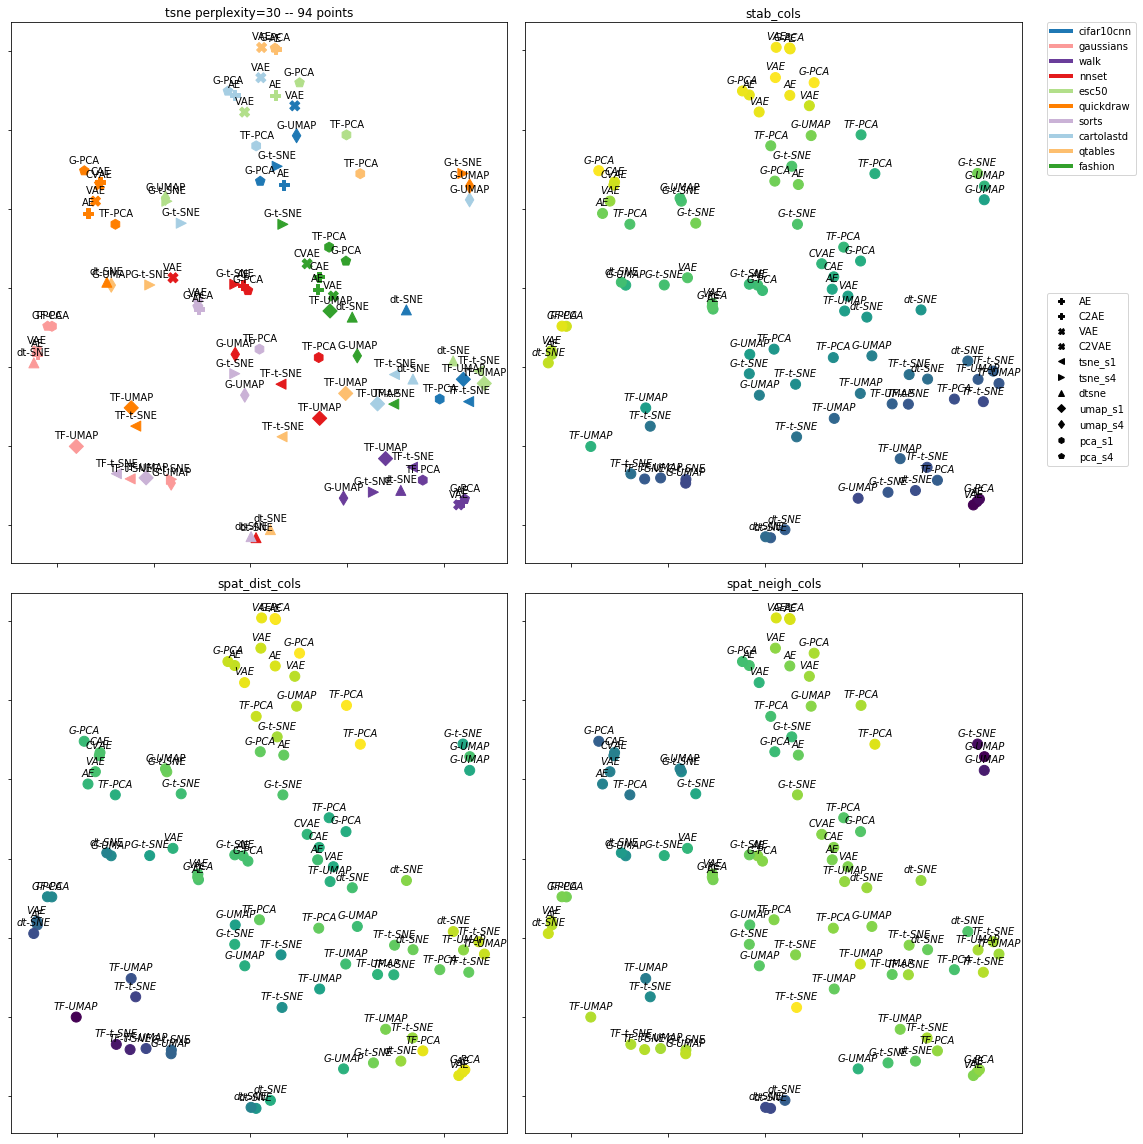

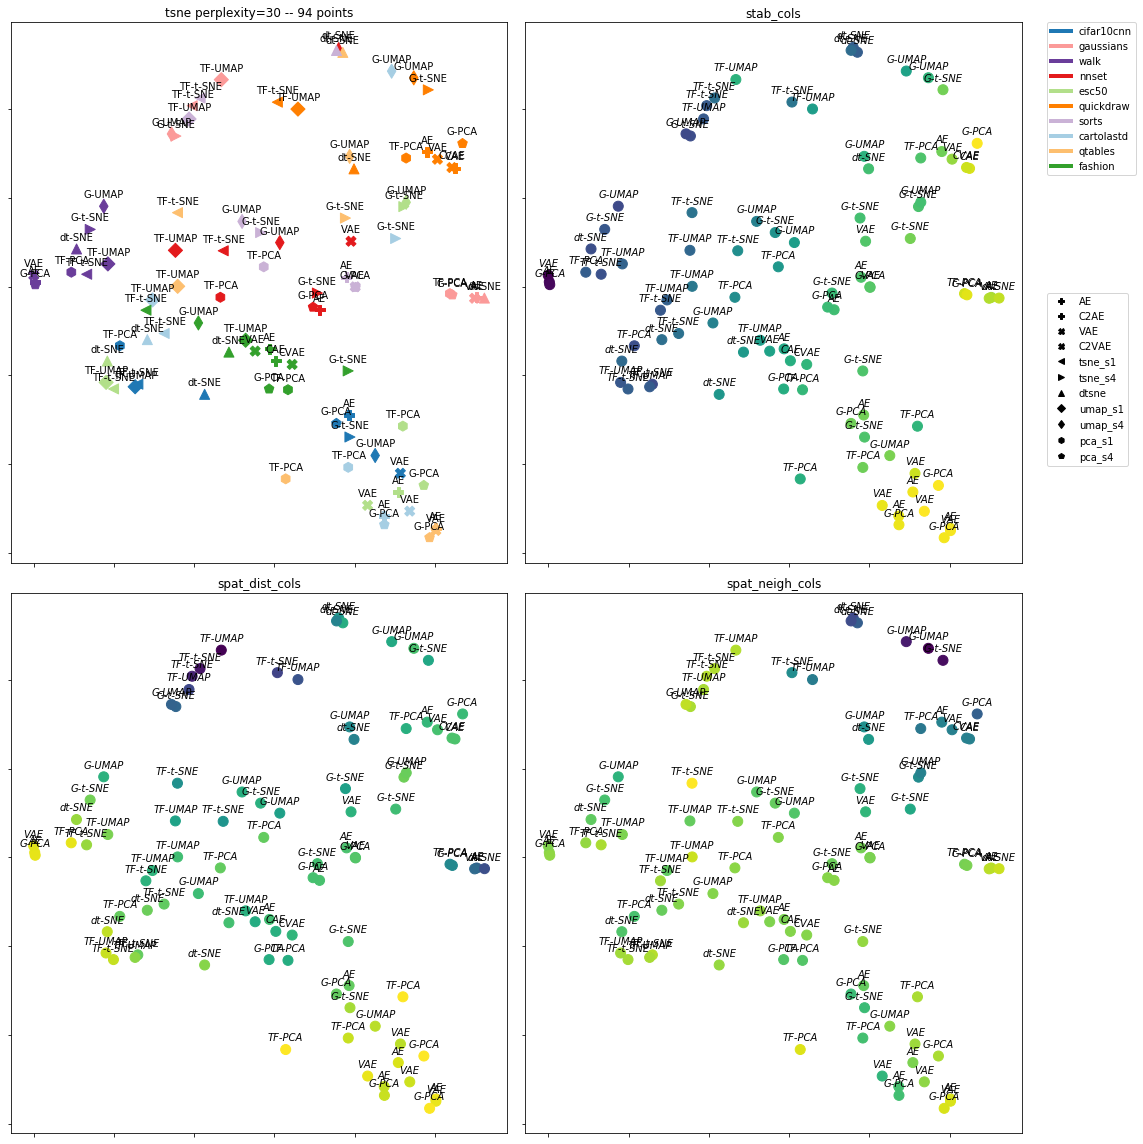

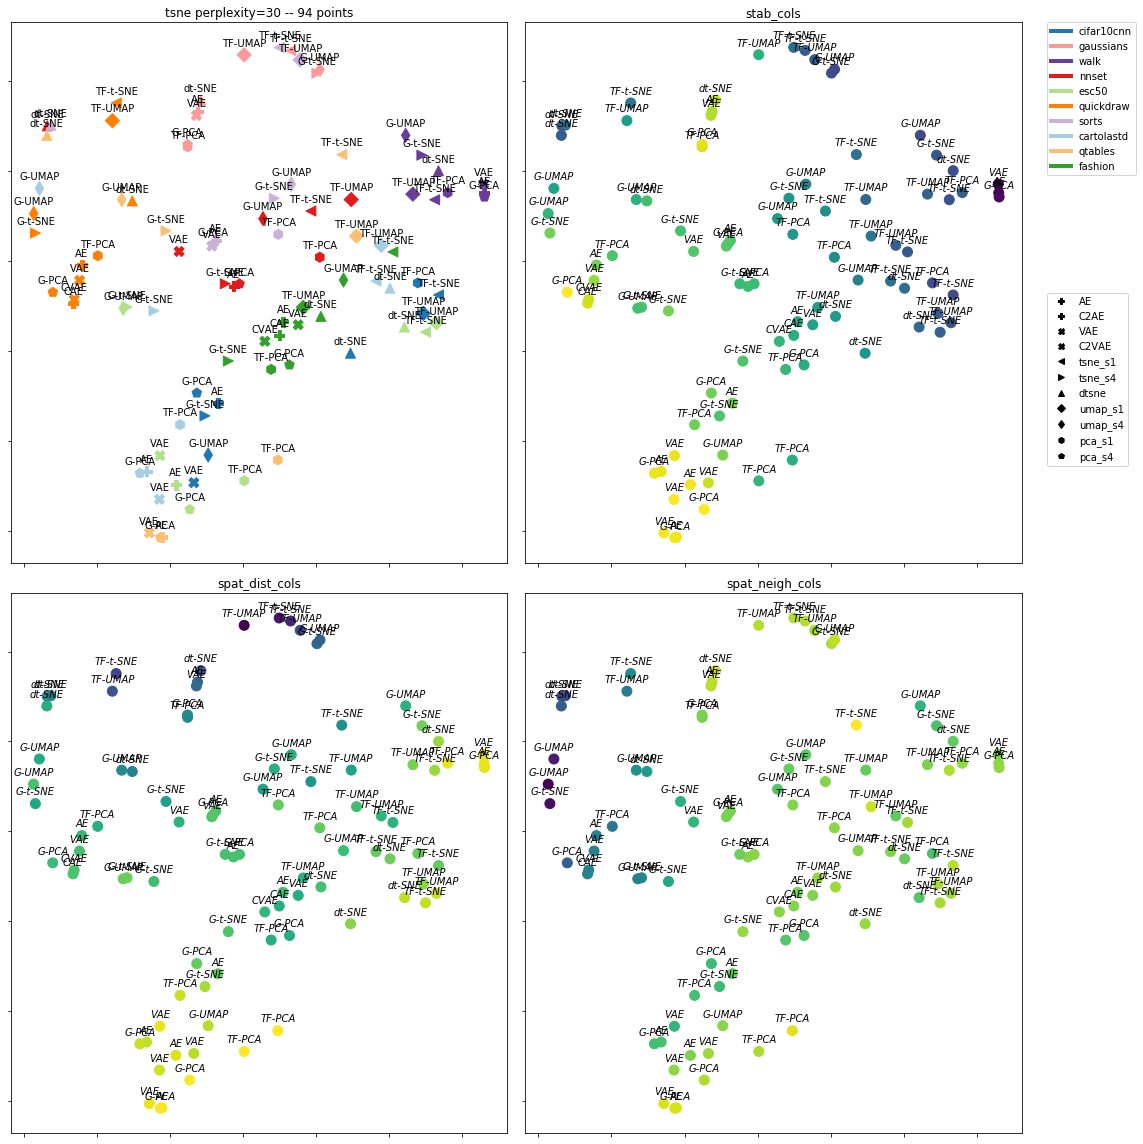

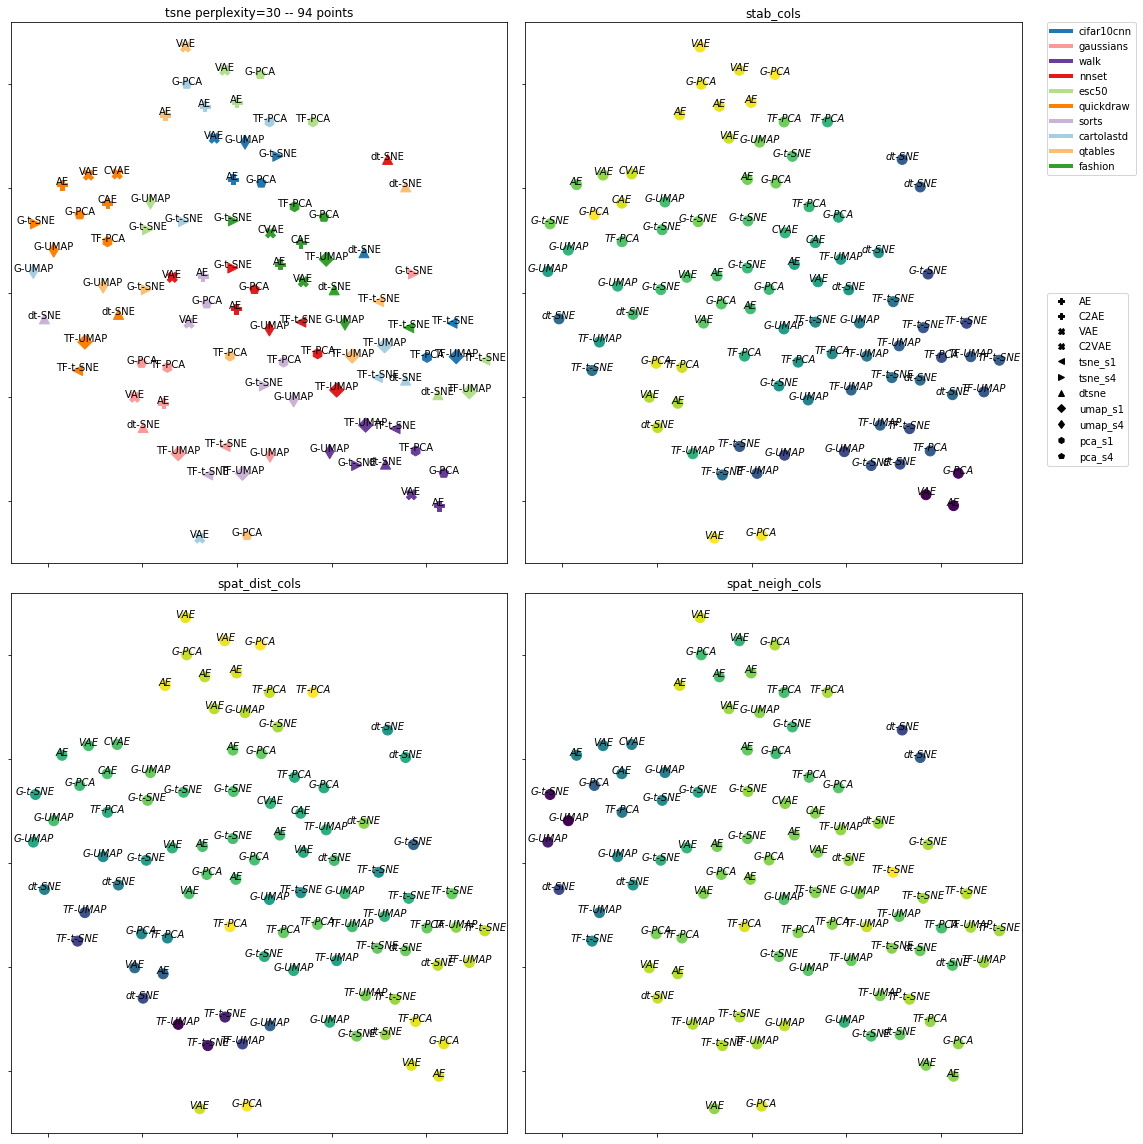

In [34]:
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc


for random_state in range(10):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,16))

    X = df_metrics[metrics]

    tsne = manifold.TSNE(n_components=2, random_state=random_state)
    Y = tsne.fit_transform(X)

    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    color_dict = dict(zip(sorted(set(df_metrics['dataset'])), colors))
    c = [color_dict[x] for x in df_metrics['dataset']]


    markers = ['P', 'P', 'X', 'X', '<', '>', '^', 'D', 'd', 'h', 'p']
    techs = ['AE', 'C2AE', 'VAE', 'C2VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'umap_s1', 'umap_s4', 'pca_s1', 'pca_s4']
    marker_dict = dict(zip(techs, markers))
    m = [marker_dict[x] for x in df_metrics['method']]


    # fig, ax = plt.subplots(figsize=(10,10))
    ax = axs[0][0]
    mscatter(Y[:, 0], Y[:, 1], c=c, s=100, m=m, ax=ax)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    text = list(zip(df_metrics['dataset'], df_metrics['method']))
    for c,t in zip(Y, text):
        ax.annotate(name_dict[t[1]], (c[0], c[1] + 0.2), fontsize=10, ha='center')
    #     ax.annotate(t[0], (c[0], c[1]), fontsize=9, style='italic', ha='center')
    plt.tight_layout()


    df = pd.DataFrame(np.array([df_metrics[spat_dist_cols].mean(axis=1),
                                df_metrics[spat_neigh_cols].mean(axis=1),
                                df_metrics[stab_cols].mean(axis=1)]).T,
                                index=df_metrics['dataset'], columns=['spat_dist_cols', 'spat_neigh_cols', 'stab_cols'])


    for i, col in enumerate(['stab_cols', 'spat_dist_cols', 'spat_neigh_cols']):
        X = df_metrics[metrics]

        tsne = manifold.TSNE(n_components=2, random_state=random_state)
        Y = tsne.fit_transform(X)

        colors = df[col]

        ax = axs.flatten()[i+1]
        ax.scatter(Y[:, 0], Y[:, 1], c=colors, s=100)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.set_title(col)

        text = list(zip(df_metrics['dataset'], df_metrics['method']))
        for c,t in zip(Y, text):
            ax.annotate(name_dict[t[1]], (c[0], c[1] + 0.2), fontsize=10, style='italic', ha='center')
    #         ax.annotate(t[0], (c[0], c[1] + 0.2), fontsize=9, ha='center')

    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=c, lw=4) for c in list(color_dict.values())]
    axs[0][1].add_artist(axs[0][1].legend(custom_lines, list(color_dict), loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.))
    custom_lines = [Line2D([0], [0], marker=m, c='k', lw=0) for m in markers]
    axs[0][1].legend(custom_lines, techs, loc='upper left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
    axs[0][0].set_title('tsne perplexity=30 -- 94 points')

    plt.tight_layout()
    fig.savefig('tsne_plot_{}.pdf'.format(random_state))

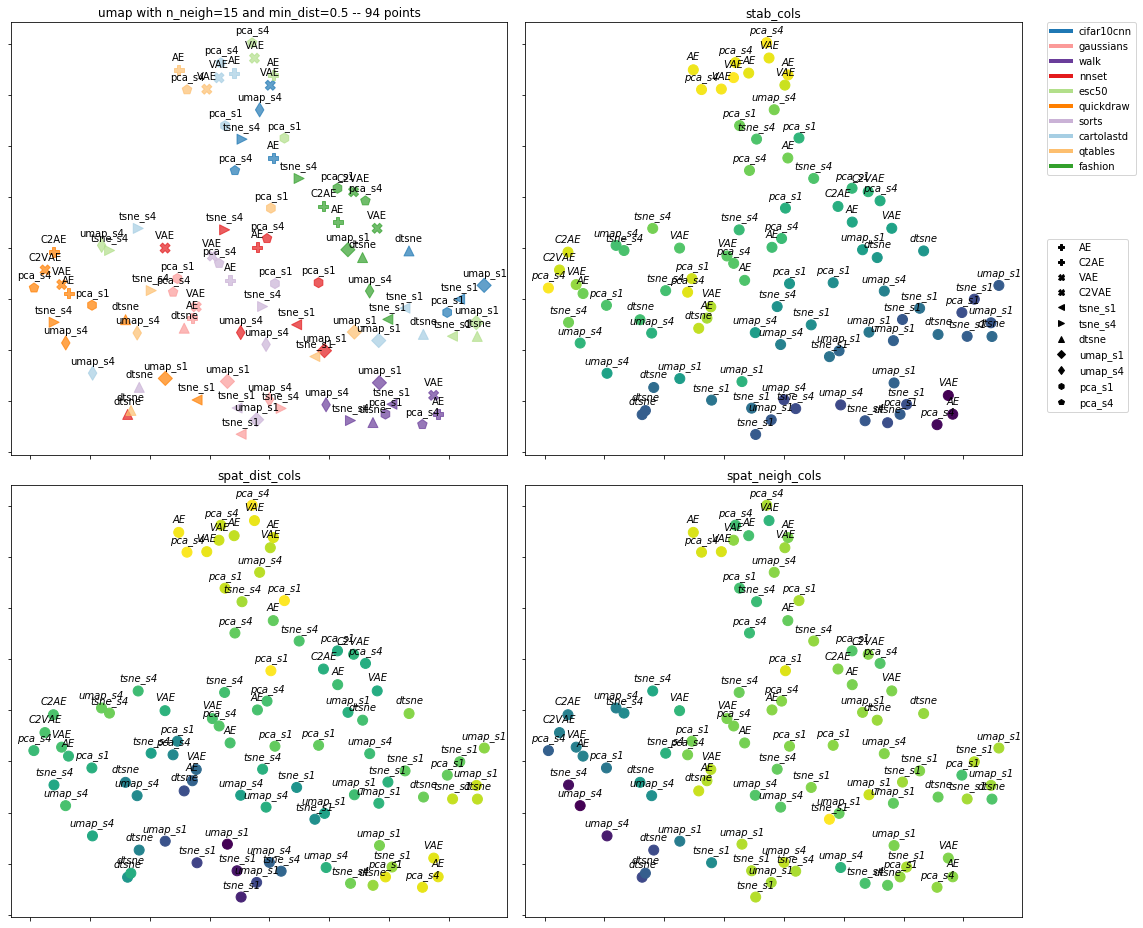

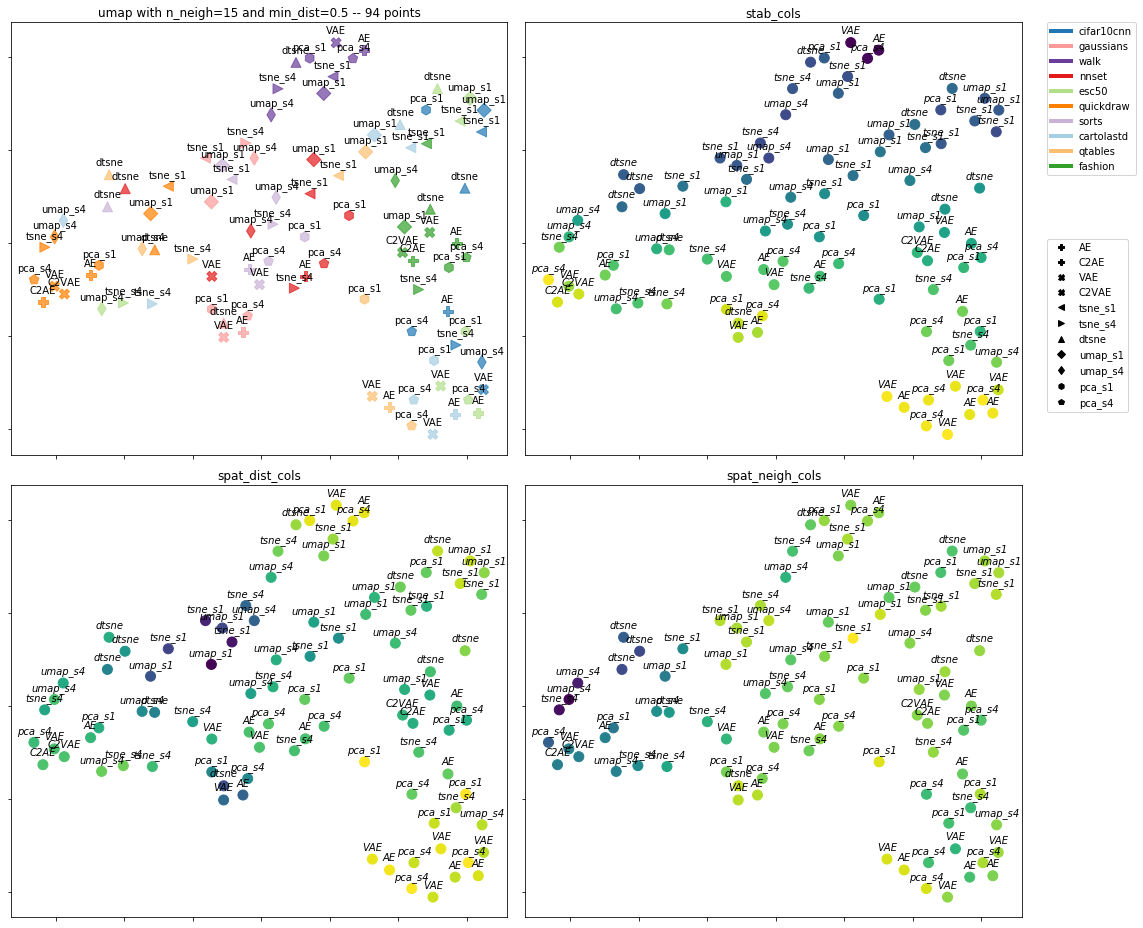

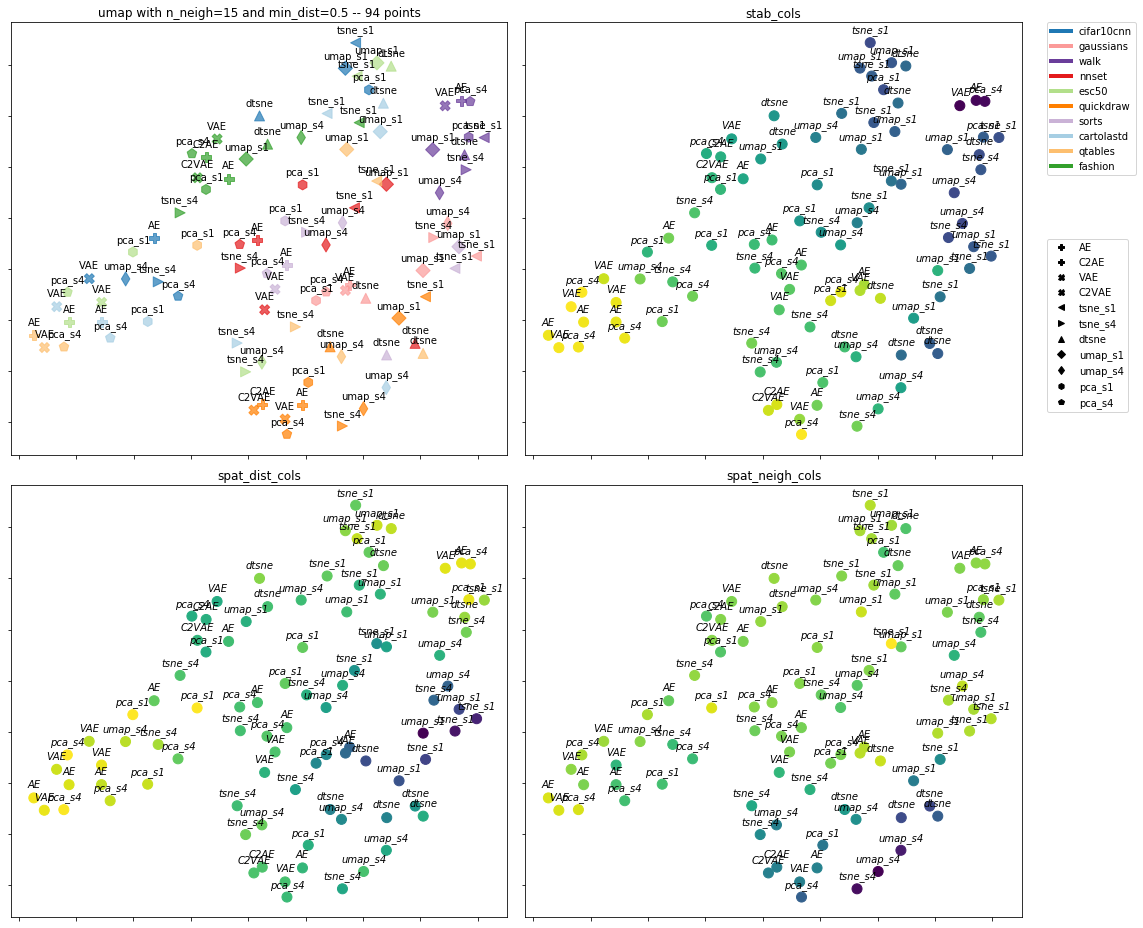

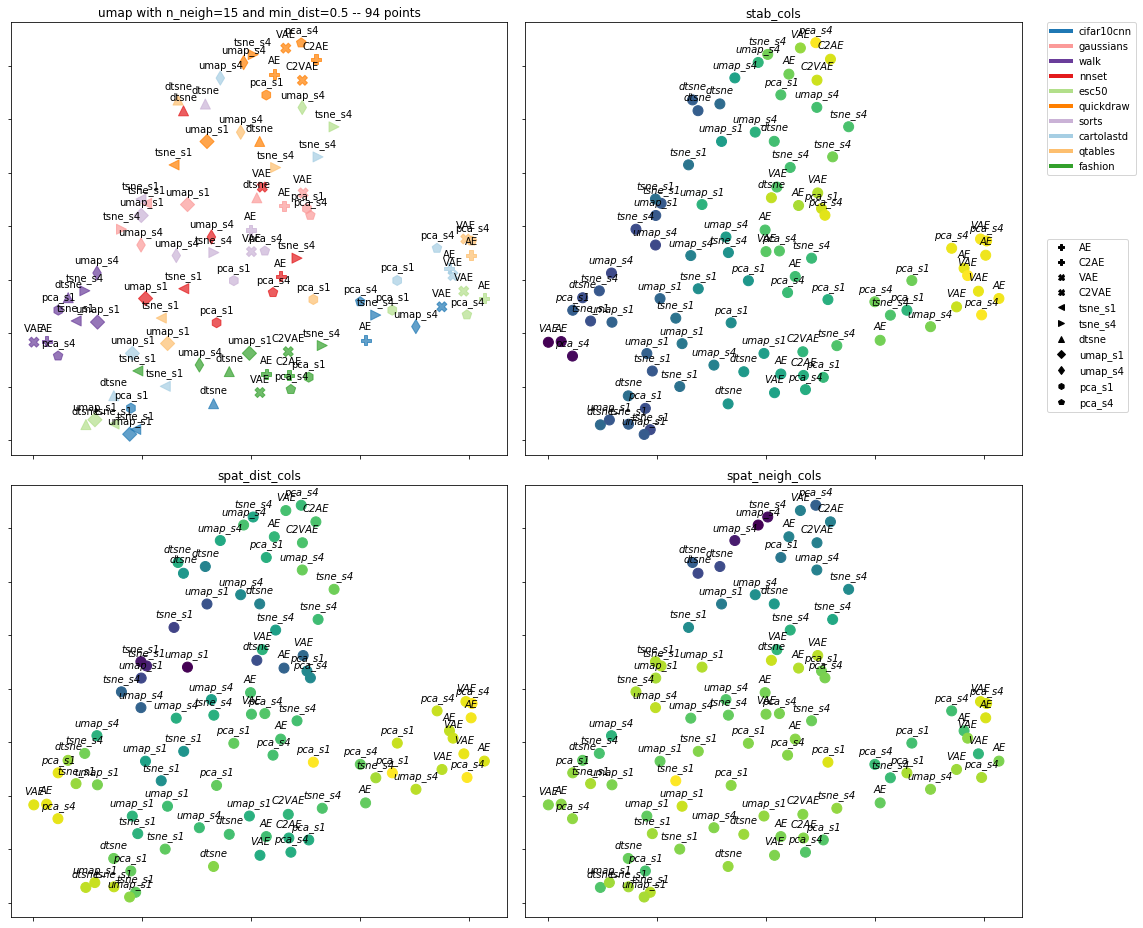

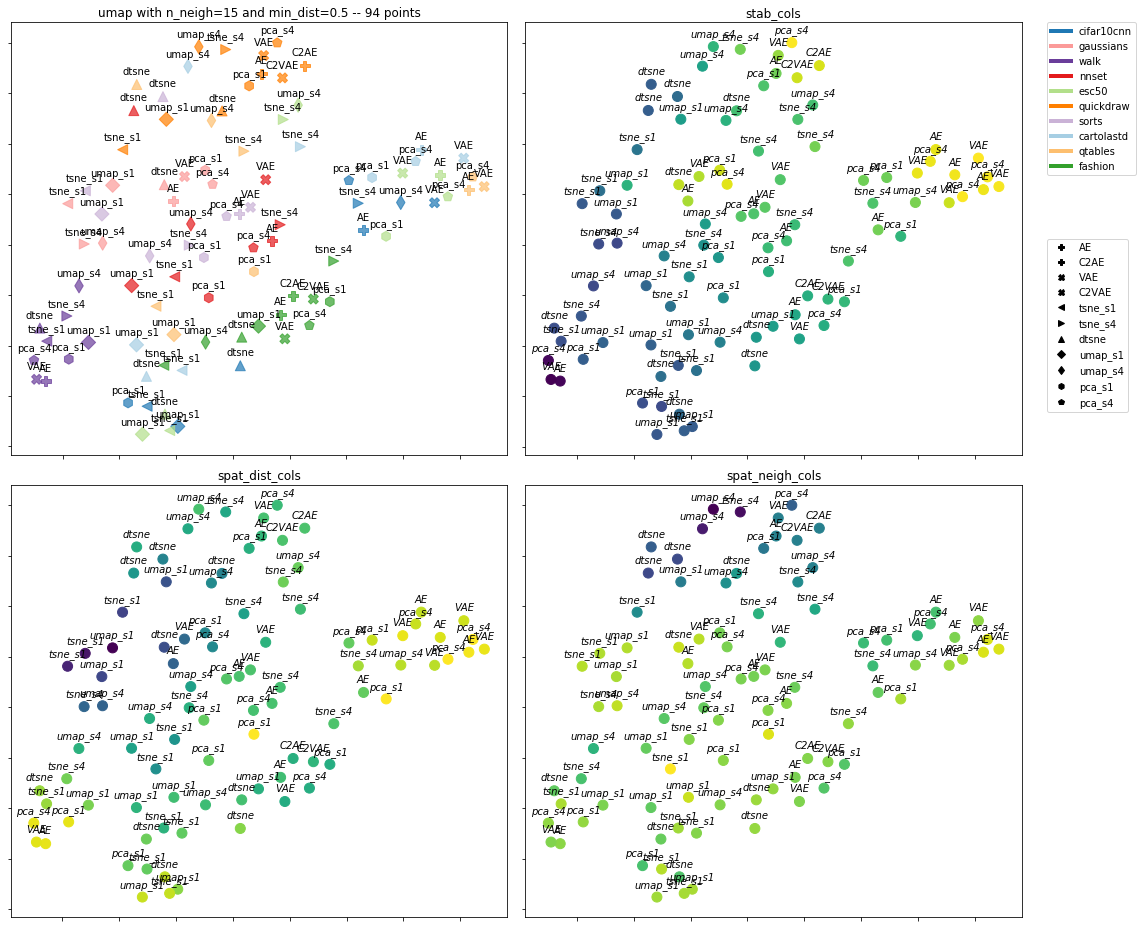

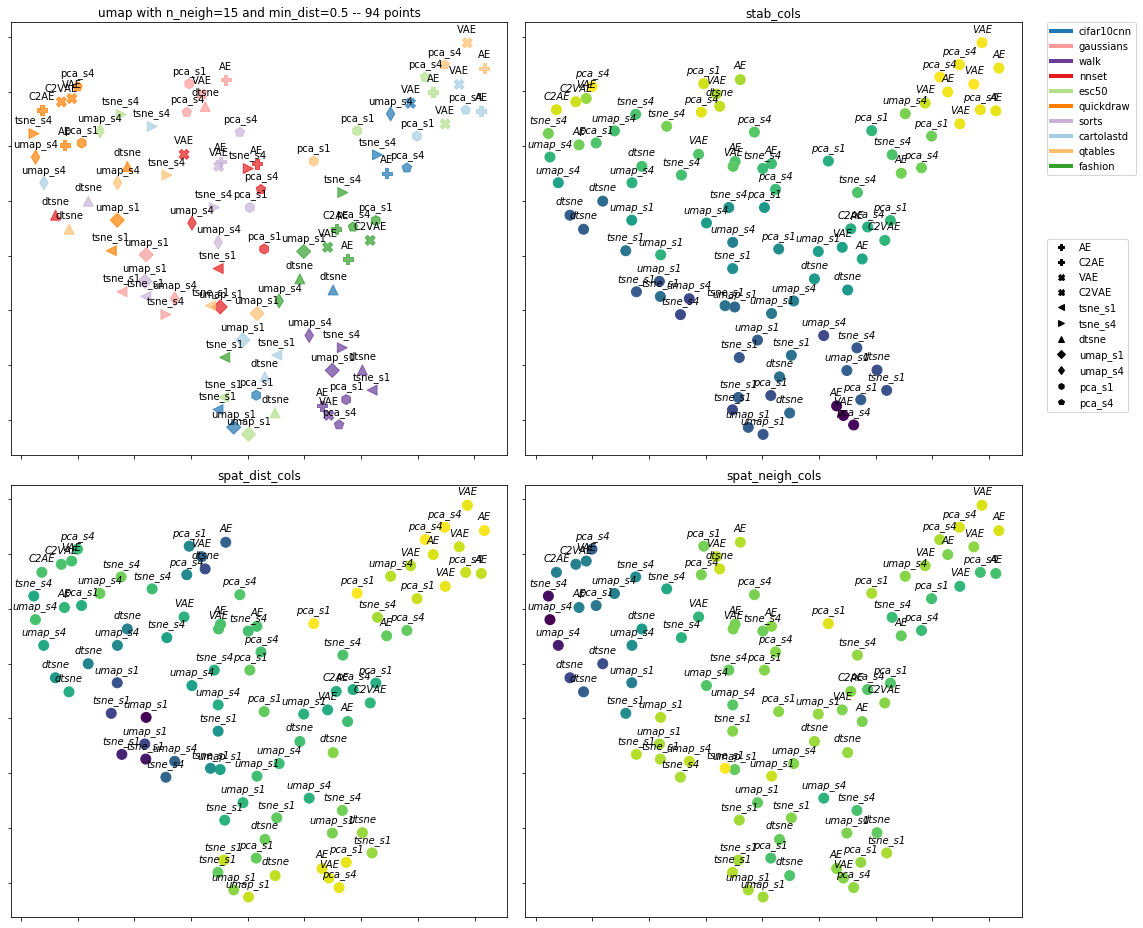

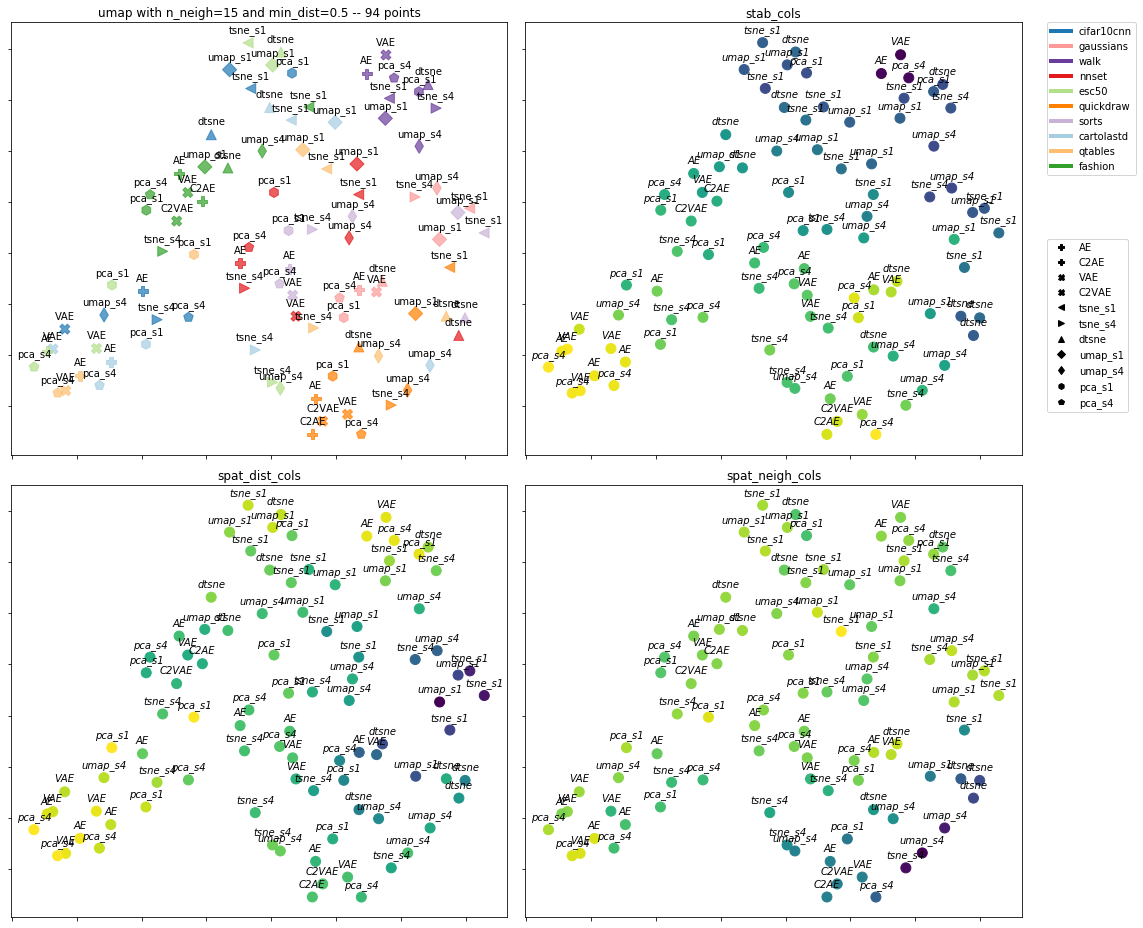

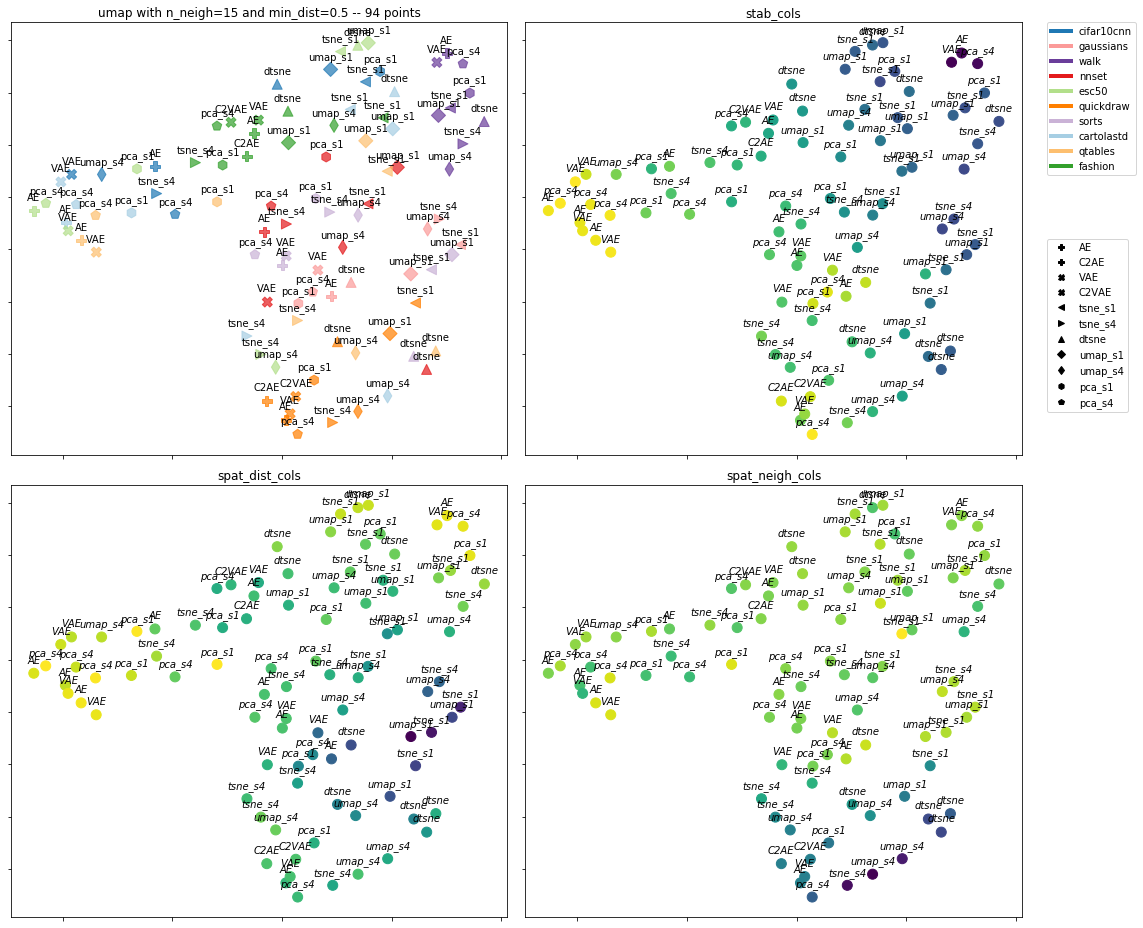

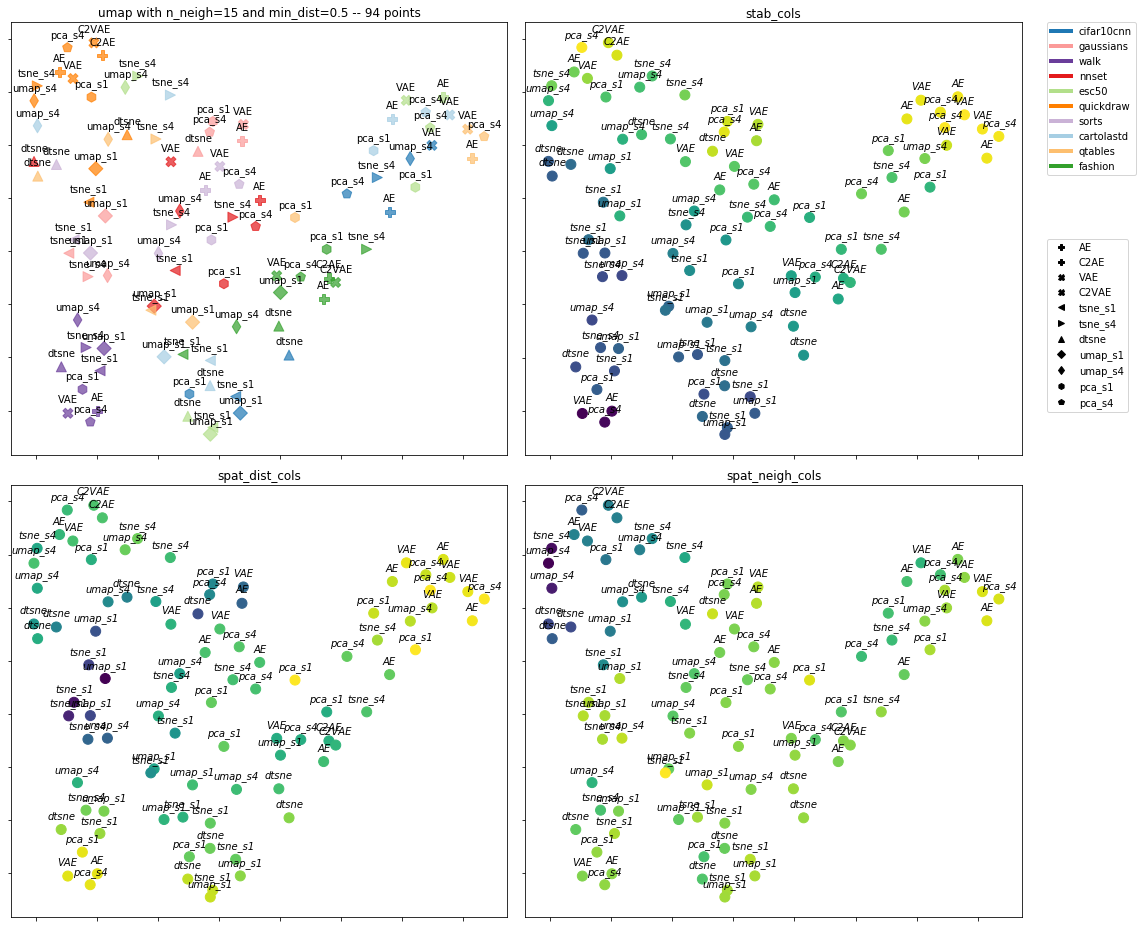

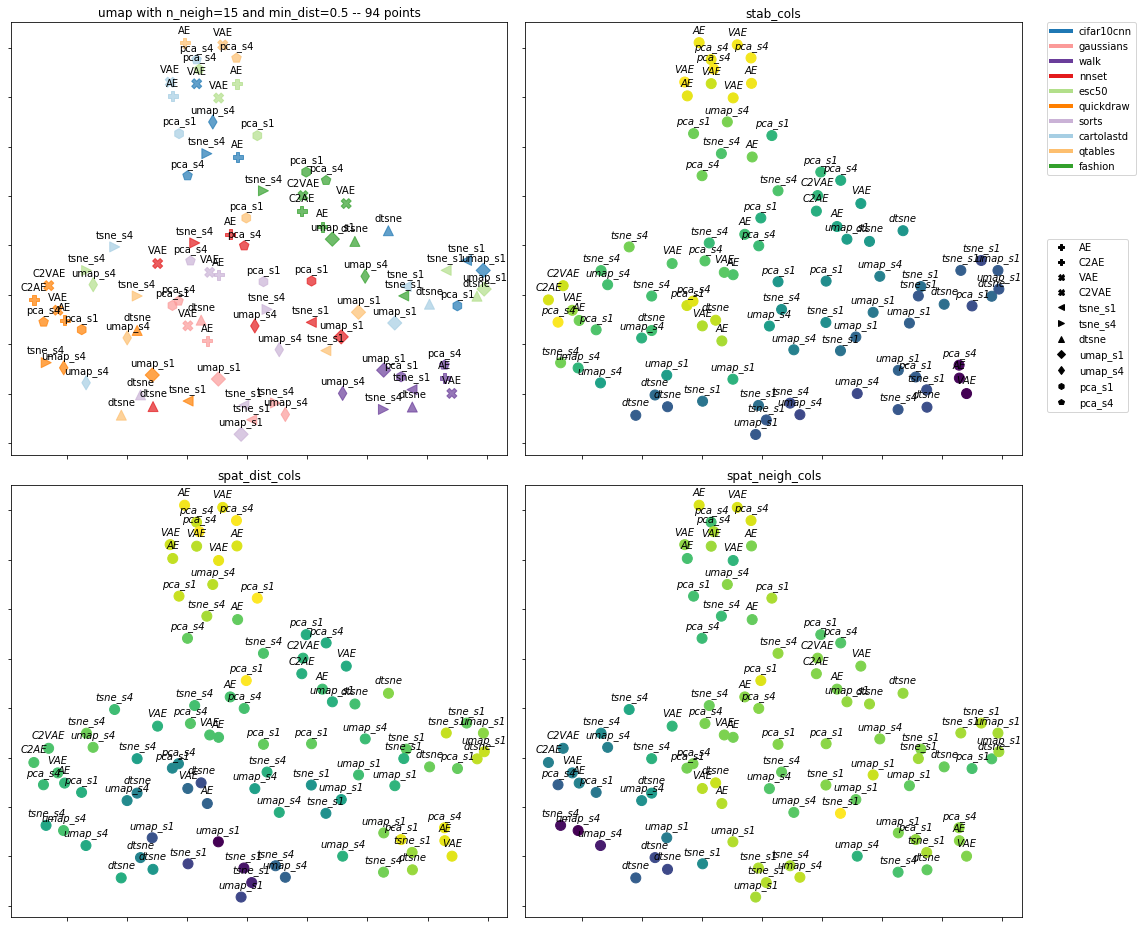

In [36]:
import umap

def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc


for random_state in range(10):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,13))

    X = df_metrics[metrics]

    proj = umap.UMAP(n_components=2, random_state=random_state, min_dist=0.5)
    Y = proj.fit_transform(X)

    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    color_dict = dict(zip(sorted(set(df_metrics['dataset'])), colors))
    c = [color_dict[x] for x in df_metrics['dataset']]


    markers = ['P', 'P', 'X', 'X', '<', '>', '^', 'D', 'd', 'h', 'p']
    techs = ['AE', 'C2AE', 'VAE', 'C2VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'umap_s1', 'umap_s4', 'pca_s1', 'pca_s4']
    marker_dict = dict(zip(techs, markers))
    m = [marker_dict[x] for x in df_metrics['method']]


    ax = axs[0][0]
    mscatter(Y[:, 0], Y[:, 1], c=c, s=100, m=m, ax=ax, alpha=0.7)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())

    text = list(zip(df_metrics['dataset'], df_metrics['method']))
    for c,t in zip(Y, text):
        ax.annotate(t[1], (c[0], c[1] + 0.2), fontsize=10, ha='center')
    #     ax.annotate(t[0], (c[0], c[1]), fontsize=9, style='italic', ha='center')
    plt.tight_layout()


    df = pd.DataFrame(np.array([df_metrics[spat_dist_cols].mean(axis=1),
                                df_metrics[spat_neigh_cols].mean(axis=1),
                                df_metrics[stab_cols].mean(axis=1)]).T,
                                index=df_metrics['dataset'], columns=['spat_dist_cols', 'spat_neigh_cols', 'stab_cols'])


    for i, col in enumerate(['stab_cols', 'spat_dist_cols', 'spat_neigh_cols']):
        X = df_metrics[metrics]

        proj = umap.UMAP(n_components=2, random_state=random_state, min_dist=0.5)
        Y = proj.fit_transform(X)

        colors = df[col]

        ax = axs.flatten()[i+1]
        ax.scatter(Y[:, 0], Y[:, 1], c=colors, s=100)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.set_title(col)

        text = list(zip(df_metrics['dataset'], df_metrics['method']))
        for c,t in zip(Y, text):
            ax.annotate(t[1], (c[0], c[1] + 0.2), fontsize=10, style='italic', ha='center')
    #         ax.annotate(t[0], (c[0], c[1] + 0.2), fontsize=9, ha='center')


    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=c, lw=4) for c in list(color_dict.values())]
    axs[0][1].add_artist(axs[0][1].legend(custom_lines, list(color_dict), loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.))
    custom_lines = [Line2D([0], [0], marker=m, c='k', lw=0) for m in markers]
    axs[0][1].legend(custom_lines, techs, loc='upper left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

    axs[0][0].set_title('umap with n_neigh=15 and min_dist=0.5 -- 94 points')

    plt.tight_layout()
    fig.savefig('umap_plot_{}.pdf'.format(random_state))


In [93]:
plt.tight_layout()
fig.savefig('umap_plot_1.pdf')

<Figure size 432x288 with 0 Axes>